<a href="https://colab.research.google.com/github/ibe-abu-chi/python_EDA/blob/master/ART_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [152]:
#importing all libraries and data needed for this analysis
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from eli5.sklearn import PermutationImportance
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")
df = pd.read_excel('Adolescent_Peads_DTG.xlsx')

In [153]:
import eli5

In [154]:
df.shape

(6215, 19)

In [155]:
df


,LGA,Datim_Code,FacilityName,PepID,Sex,CurrentARTStatuse,ARTStartDate,RegimenAtARTStart,FirstTLD_Pickup,DateofFirstTLD_Pickup,CurAge_Months,CurAge_Years,VL_30Jun2019,VL_31Dec2019,VL_30Jun2020,VL_31Dec2020,VL_30Jun2021,VL_31Dec2021,VL_30Jun2022
0,ADO,RWy8gQx6BBr,Igumale General Hospital,GU-16-0074,M,Active,2016-04-13,TDF-3TC-EFV,TDF-3TC-DTG,2019-06-05,234.0,19,NaN,NaN,40.0,40.0,40.0,71.0,71.0
1,ADO,RWy8gQx6BBr,Igumale General Hospital,GUP-20-0013,M,Active,2020-10-07,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-12-01,41.0,3,NaN,NaN,NaN,NaN,NaN,390.0,399.0
2,APA,fhd28Wdp5gV,Ugbokpo General Hospital,OK-17-0031,F,Active,2013-05-23,AZT-3TC-NVP,TDF-3TC-DTG,2019-07-16,232.0,19,NaN,NaN,12782.0,20.0,20.0,0.0,0.0
3,APA,fhd28Wdp5gV,Ugbokpo General Hospital,OK-21-0026,M,Active,2021-03-08,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-09-15,87.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,APA,fhd28Wdp5gV,Ugbokpo General Hospital,OKP-16-0046,M,Active,2014-03-27,AZT-3TC-NVP,ABC-3TC-DTG,2020-07-14,104.0,9,NaN,NaN,5469.0,49934.0,25786.0,25786.0,1631.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6210,VANDEIKYA,fCwe9dV4kjP,Vandeikya General Hospital,VDP-21-0017,M,Active,2021-06-17,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-09-28,114.0,9,NaN,NaN,NaN,NaN,NaN,39.0,0.0
6211,VANDEIKYA,fCwe9dV4kjP,Vandeikya General Hospital,VDP-21-0018,M,Active,2021-07-13,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-10-06,54.0,4,NaN,NaN,NaN,NaN,NaN,NaN,644.0
6212,VANDEIKYA,fCwe9dV4kjP,Vandeikya General Hospital,VDP-21-0020,M,Active,2021-09-02,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-12-18,78.0,6,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6213,VANDEIKYA,fCwe9dV4kjP,Vandeikya General Hospital,VDP-21-0023,M,Active,2021-09-27,ABC-3TC-LPV/r,ABC-3TC-DTG,2022-02-03,114.0,9,NaN,NaN,NaN,NaN,NaN,NaN,20.0


In [156]:
# Delete multiple columns from the dataframe
df1 = df.drop([ 'Datim_Code', 'PepID'], axis=1)

In [157]:
df1.fillna(0)

,LGA,FacilityName,Sex,CurrentARTStatuse,ARTStartDate,RegimenAtARTStart,FirstTLD_Pickup,DateofFirstTLD_Pickup,CurAge_Months,CurAge_Years,VL_30Jun2019,VL_31Dec2019,VL_30Jun2020,VL_31Dec2020,VL_30Jun2021,VL_31Dec2021,VL_30Jun2022
0,ADO,Igumale General Hospital,M,Active,2016-04-13,TDF-3TC-EFV,TDF-3TC-DTG,2019-06-05,234.0,19,0.0,0.0,40.0,40.0,40.0,71.0,71.0
1,ADO,Igumale General Hospital,M,Active,2020-10-07,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-12-01,41.0,3,0.0,0.0,0.0,0.0,0.0,390.0,399.0
2,APA,Ugbokpo General Hospital,F,Active,2013-05-23,AZT-3TC-NVP,TDF-3TC-DTG,2019-07-16,232.0,19,0.0,0.0,12782.0,20.0,20.0,0.0,0.0
3,APA,Ugbokpo General Hospital,M,Active,2021-03-08,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-09-15,87.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,APA,Ugbokpo General Hospital,M,Active,2014-03-27,AZT-3TC-NVP,ABC-3TC-DTG,2020-07-14,104.0,9,0.0,0.0,5469.0,49934.0,25786.0,25786.0,1631.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6210,VANDEIKYA,Vandeikya General Hospital,M,Active,2021-06-17,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-09-28,114.0,9,0.0,0.0,0.0,0.0,0.0,39.0,0.0
6211,VANDEIKYA,Vandeikya General Hospital,M,Active,2021-07-13,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-10-06,54.0,4,0.0,0.0,0.0,0.0,0.0,0.0,644.0
6212,VANDEIKYA,Vandeikya General Hospital,M,Active,2021-09-02,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-12-18,78.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6213,VANDEIKYA,Vandeikya General Hospital,M,Active,2021-09-27,ABC-3TC-LPV/r,ABC-3TC-DTG,2022-02-03,114.0,9,0.0,0.0,0.0,0.0,0.0,0.0,20.0


In [158]:
# Defining all the conditions the vl colums
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_31Dec2021'] = df1['VL_31Dec2021'].apply(condition)

In [159]:
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_30Jun2019'] = df1['VL_30Jun2019'].apply(condition)

In [160]:
			
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_31Dec2019'] = df1['VL_31Dec2019'].apply(condition)

In [161]:
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_30Jun2020'] = df1['VL_30Jun2020'].apply(condition)

In [162]:
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_31Dec2020'] = df1['VL_31Dec2020'].apply(condition)

In [163]:
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_30Jun2021'] = df1['VL_30Jun2021'].apply(condition)

In [164]:
def condition(x):
    if x>= 1000:
        return "UNSUPPRESSED"
    elif x>= 200:
        return "HIGH LLV"
    elif x >= 50:
        return 'LOW LLV'   
    else:
        return 'SUPPRESSED'
 
# Applying the conditions
df1['VL_30Jun2022'] = df1['VL_30Jun2022'].apply(condition)

In [165]:
def condition(x):
    if x > 18: #19 AND ABOVE
        return "YOUNG ADULT"
    elif x > 12: # 13 TO 18
        return "TEEN"
    elif x > 5: # 6 T0 12
        return 'SCHOOL AGE'
    elif x > 2: # 3 TO 5
        return "PRE SCHOOL"
    elif x > 1:
        return 'TODDLER'      
    else:
        return 'INFANT'
 
# Applying the conditions
df1['AgeGroup'] = df1['CurAge_Years'].apply(condition)

In [166]:
#extracting the quaters from TLD start date
df1['QTLD'] = df1['DateofFirstTLD_Pickup'].dt.to_period('Q')

In [167]:
df1.head()

,LGA,FacilityName,Sex,CurrentARTStatuse,ARTStartDate,RegimenAtARTStart,FirstTLD_Pickup,DateofFirstTLD_Pickup,CurAge_Months,CurAge_Years,VL_30Jun2019,VL_31Dec2019,VL_30Jun2020,VL_31Dec2020,VL_30Jun2021,VL_31Dec2021,VL_30Jun2022,AgeGroup,QTLD
0,ADO,Igumale General Hospital,M,Active,2016-04-13,TDF-3TC-EFV,TDF-3TC-DTG,2019-06-05,234.0,19,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,LOW LLV,LOW LLV,YOUNG ADULT,2019Q2
1,ADO,Igumale General Hospital,M,Active,2020-10-07,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-12-01,41.0,3,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,HIGH LLV,HIGH LLV,PRE SCHOOL,2021Q4
2,APA,Ugbokpo General Hospital,F,Active,2013-05-23,AZT-3TC-NVP,TDF-3TC-DTG,2019-07-16,232.0,19,SUPPRESSED,SUPPRESSED,UNSUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,YOUNG ADULT,2019Q3
3,APA,Ugbokpo General Hospital,M,Active,2021-03-08,ABC-3TC-LPV/r,ABC-3TC-DTG,2021-09-15,87.0,7,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SUPPRESSED,SCHOOL AGE,2021Q3
4,APA,Ugbokpo General Hospital,M,Active,2014-03-27,AZT-3TC-NVP,ABC-3TC-DTG,2020-07-14,104.0,9,SUPPRESSED,SUPPRESSED,UNSUPPRESSED,UNSUPPRESSED,UNSUPPRESSED,UNSUPPRESSED,UNSUPPRESSED,SCHOOL AGE,2020Q3


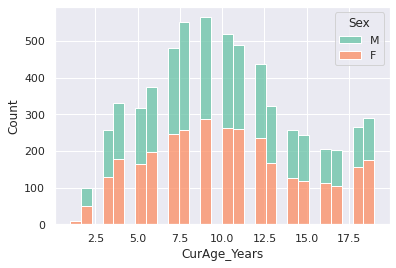

In [168]:
sns.histplot(data=df1, x="CurAge_Years", hue="Sex", multiple="stack", palette='Set2' )


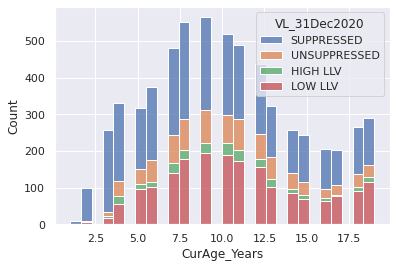

In [169]:
sns.histplot(data=df1, x="CurAge_Years", hue="VL_31Dec2020", multiple="stack")


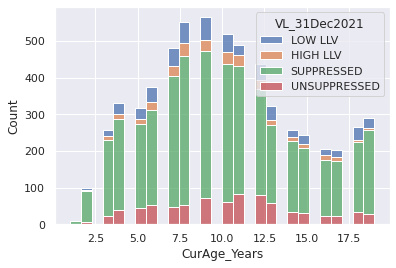

In [170]:
sns.histplot(data=df1, x="CurAge_Years", hue="VL_31Dec2021", multiple="stack")


Text(0.5, 1.0, 'SUPPRESSION BASED ON PCK-UP QUATER AFTER SECOND VL')

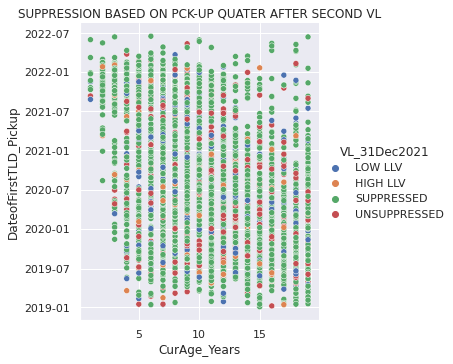

In [171]:
sns.relplot(y=df1.DateofFirstTLD_Pickup, x=df1.CurAge_Years, hue=df1.VL_31Dec2021)
plt.title("SUPPRESSION BASED ON PCK-UP QUATER AFTER SECOND VL")

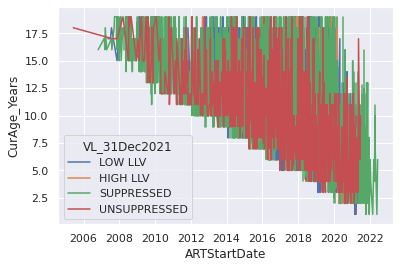

In [172]:
sns.lineplot(data=df1, y="CurAge_Years", x="ARTStartDate", hue = 'VL_31Dec2021', err_style="bars")

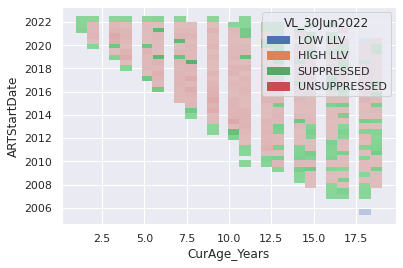

In [173]:
sns.histplot(data=df1, x="CurAge_Years", y="ARTStartDate", hue='VL_30Jun2022')


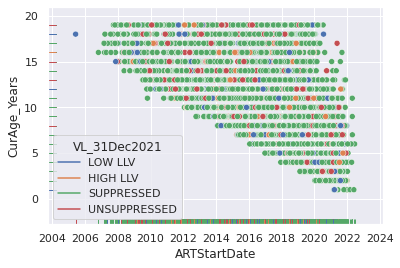

In [174]:
sns.scatterplot(data=df1, y="CurAge_Years", x="ARTStartDate", hue='VL_30Jun2022')
sns.rugplot(data=df1, y="CurAge_Years", x="ARTStartDate", hue='VL_31Dec2021')


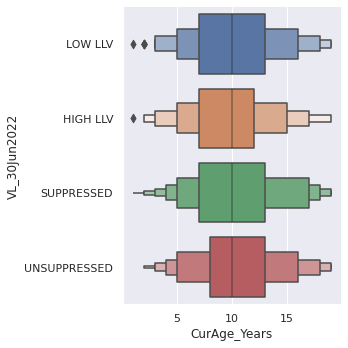

In [175]:
sns.catplot(data=df1, x="CurAge_Years", y='VL_30Jun2022', kind = 'boxen')

In [176]:
df1.columns

Index(['LGA', 'FacilityName', 'Sex', 'CurrentARTStatuse', 'ARTStartDate',
       'RegimenAtARTStart', 'FirstTLD_Pickup', 'DateofFirstTLD_Pickup',
       'CurAge_Months', 'CurAge_Years', 'VL_30Jun2019', 'VL_31Dec2019',
       'VL_30Jun2020', 'VL_31Dec2020', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022', 'AgeGroup', 'QTLD'],
      dtype='object')

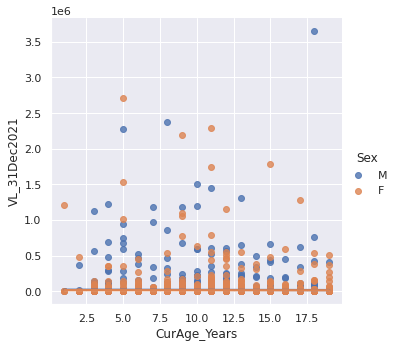

In [177]:
sns.lmplot(data = df, x='CurAge_Years', y='VL_31Dec2021', hue = 'Sex')

In [178]:
df1.columns

Index(['LGA', 'FacilityName', 'Sex', 'CurrentARTStatuse', 'ARTStartDate',
       'RegimenAtARTStart', 'FirstTLD_Pickup', 'DateofFirstTLD_Pickup',
       'CurAge_Months', 'CurAge_Years', 'VL_30Jun2019', 'VL_31Dec2019',
       'VL_30Jun2020', 'VL_31Dec2020', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022', 'AgeGroup', 'QTLD'],
      dtype='object')

In [179]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Jun2022'] = df['VL_30Jun2022'].apply(condition)

In [180]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Jun2021'] = df['VL_30Jun2021'].apply(condition)

In [181]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Jun2020'] = df['VL_30Jun2020'].apply(condition)

In [182]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Jun2019'] = df['VL_30Jun2019'].apply(condition)

In [183]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Dec2021'] = df['VL_31Dec2021'].apply(condition)

In [184]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Dec2020'] = df['VL_31Dec2020'].apply(condition)

In [185]:
def condition(x):
    if x >= 1000:
        return 3
    elif x>= 200:
        return 2
    elif x >= 50:
        return 1  
    else:
        return 0
 
# Applying the conditions
df1['VL_Dec2019'] = df['VL_31Dec2019'].apply(condition)

In [186]:
def condition(x):
    if x > 18: #19 AND ABOVE
        return 5
    elif x > 12: # 13 TO 18
        return 4
    elif x > 5: # 6 T0 12
        return 3
    elif x > 2: # 3 TO 5
        return 2
    elif x > 1:
        return 1      
    else:
        return 0
 
# Applying the conditions
df1['AgeGrade'] = df['CurAge_Years'].apply(condition)

In [187]:
#Creating a dummy variable for sex status
df1['SEX_D'] = np.where(df['Sex'] == "M", 1, 0) 

In [188]:
df2 = df1[['QTLD', 'VL_Jun2022', 'VL_Jun2021', 'VL_Jun2020', 'VL_Jun2019', 'VL_Dec2021', 'VL_Dec2020', 'SEX_D', 'CurAge_Years', 'AgeGrade']]

In [189]:
df2.head()

,QTLD,VL_Jun2022,VL_Jun2021,VL_Jun2020,VL_Jun2019,VL_Dec2021,VL_Dec2020,SEX_D,CurAge_Years,AgeGrade
0,2019Q2,1,0,0,0,1,0,1,19,5
1,2021Q4,2,0,0,0,2,0,1,3,2
2,2019Q3,0,0,3,0,0,0,0,19,5
3,2021Q3,0,0,0,0,0,0,1,7,3
4,2020Q3,3,3,3,0,3,3,1,9,3


In [190]:
df2.describe()

,VL_Jun2022,VL_Jun2021,VL_Jun2020,VL_Jun2019,VL_Dec2021,VL_Dec2020,SEX_D,CurAge_Years,AgeGrade
count,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000
mean,0.488174,0.838455,0.859855,0.396299,0.582784,0.834272,0.479324,10.178922,3.152212
std,1.008085,1.056636,1.159957,0.957322,1.056891,1.046189,0.499613,4.492153,0.791409
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,19.000000,5.000000


Text(0.5, 1.0, 'SHOWING AGE DISTIBUTION')

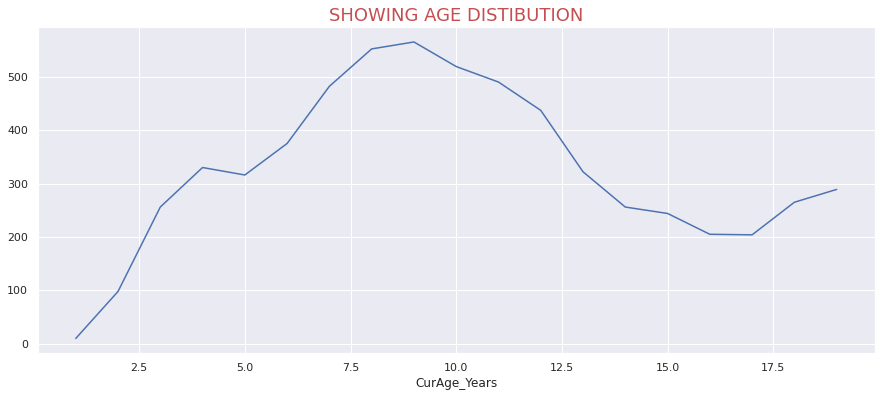

In [191]:
plt.figure(figsize = (15,6))
df2.groupby('CurAge_Years').size().plot()
plt.title('SHOWING AGE DISTIBUTION', color='r', fontsize=18)

Text(0.5, 1.0, 'SHOWING AGE DISTIBUTION')

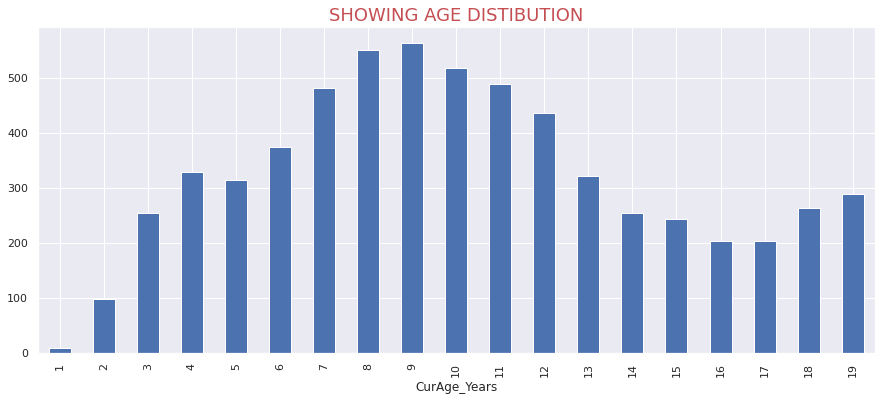

In [192]:
plt.figure(figsize = (15,6))
df2.groupby(['CurAge_Years']).size().plot(kind='bar')
plt.title('SHOWING AGE DISTIBUTION', color='r', fontsize=18)

In [193]:
a = df.groupby(['CurAge_Years', 'Sex'])['Sex'].count().reset_index(name='Count')
a['Percent(%)'] = a.Count/len(df) * 100
print(a)

    CurAge_Years Sex  Count  Percent(%)
0              1   F      8    0.128721
1              1   M      2    0.032180
2              2   F     50    0.804505
3              2   M     48    0.772325
4              3   F    130    2.091714
5              3   M    126    2.027353
6              4   F    178    2.864039
7              4   M    152    2.445696
8              5   F    165    2.654867
9              5   M    151    2.429606
10             6   F    196    3.153660
11             6   M    179    2.880129
12             7   F    247    3.974256
13             7   M    235    3.781175
14             8   F    257    4.135157
15             8   M    295    4.746581
16             9   F    288    4.633950
17             9   M    277    4.456959
18            10   F    262    4.215607
19            10   M    257    4.135157
20            11   F    261    4.199517
21            11   M    229    3.684634
22            12   F    235    3.781175
23            12   M    202    3.250201


Text(0.5, 1.0, 'SHOWING AGE DISTRIBUTION BASED ON SEX')

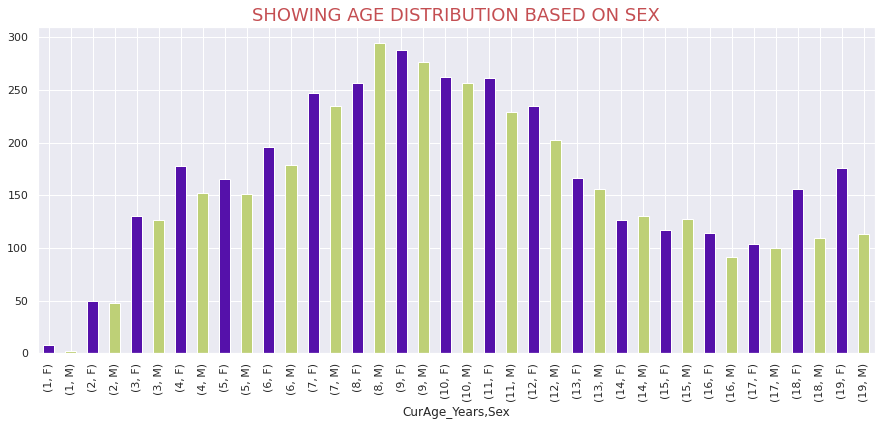

In [194]:
plt.figure(figsize = (15,6))
df1.groupby(['CurAge_Years','Sex']).size().plot(kind = 'bar', color=["#5511aa", "#bed077"])
plt.title('SHOWING AGE DISTRIBUTION BASED ON SEX', color='r', fontsize=18)

In [195]:
#number of each sex in eacg age groupp of the data set
a = df1.groupby(['AgeGroup', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

       AgeGroup Sex  Total  Percent(%)
0        INFANT   F      8    0.128721
1        INFANT   M      2    0.032180
2    PRE SCHOOL   F    473    7.610619
3    PRE SCHOOL   M    429    6.902655
4    SCHOOL AGE   F   1746   28.093323
5    SCHOOL AGE   M   1674   26.934835
6          TEEN   F    783   12.598552
7          TEEN   M    713   11.472245
8       TODDLER   F     50    0.804505
9       TODDLER   M     48    0.772325
10  YOUNG ADULT   F    176    2.831858
11  YOUNG ADULT   M    113    1.818182


Text(0.5, 1.0, 'SEX VS AGE GROUP DISTRIBUTION')

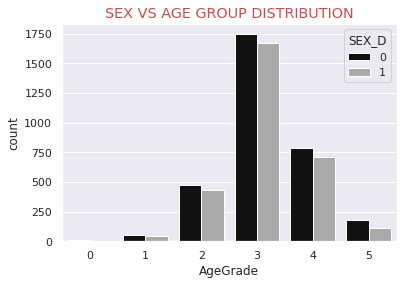

In [196]:
sns.countplot(data=df2, x='AgeGrade', hue='SEX_D', palette=["#111111", "#aaaaaa"])
plt.title('SEX VS AGE GROUP DISTRIBUTION', 
          color='r', fontsize='large')


In [197]:
#dirst vl result based on at start of TLD based on quater

a = df1.groupby(['AgeGroup', 'VL_30Jun2022'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

       AgeGroup  VL_30Jun2022  Total  Percent(%)
0        INFANT      HIGH LLV      1    0.016090
1        INFANT       LOW LLV      1    0.016090
2        INFANT    SUPPRESSED      8    0.128721
3    PRE SCHOOL      HIGH LLV     33    0.530973
4    PRE SCHOOL       LOW LLV     70    1.126307
5    PRE SCHOOL    SUPPRESSED    720   11.584875
6    PRE SCHOOL  UNSUPPRESSED     79    1.271118
7    SCHOOL AGE      HIGH LLV    151    2.429606
8    SCHOOL AGE       LOW LLV    220    3.539823
9    SCHOOL AGE    SUPPRESSED   2647   42.590507
10   SCHOOL AGE  UNSUPPRESSED    402    6.468222
11         TEEN      HIGH LLV     52    0.836685
12         TEEN       LOW LLV     87    1.399839
13         TEEN    SUPPRESSED   1165   18.744972
14         TEEN  UNSUPPRESSED    192    3.089300
15      TODDLER      HIGH LLV      8    0.128721
16      TODDLER       LOW LLV      5    0.080451
17      TODDLER    SUPPRESSED     74    1.190668
18      TODDLER  UNSUPPRESSED     11    0.176991
19  YOUNG ADULT     

In [198]:
#percentage of first vl result at start of TLD by quater
a = df1.groupby(['VL_30Jun2019', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

   VL_30Jun2019 Sex  Total  Percent(%)
0      HIGH LLV   F     50    0.804505
1      HIGH LLV   M     38    0.611424
2       LOW LLV   F    149    2.397426
3       LOW LLV   M    122    1.962993
4    SUPPRESSED   F   2726   43.861625
5    SUPPRESSED   M   2458   39.549477
6  UNSUPPRESSED   F    311    5.004023
7  UNSUPPRESSED   M    361    5.808528


In [199]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2020', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

   VL_30Jun2020 Sex  Total  Percent(%)
0      HIGH LLV   F    122    1.962993
1      HIGH LLV   M    114    1.834272
2       LOW LLV   F    697   11.214803
3       LOW LLV   M    605    9.734513
4    SUPPRESSED   F   1823   29.332261
5    SUPPRESSED   M   1664   26.773934
6  UNSUPPRESSED   F    594    9.557522
7  UNSUPPRESSED   M    596    9.589702


In [200]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2021', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

   VL_30Jun2021 Sex  Total  Percent(%)
0      HIGH LLV   F    177    2.847949
1      HIGH LLV   M    159    2.558327
2       LOW LLV   F    994   15.993564
3       LOW LLV   M    833   13.403057
4    SUPPRESSED   F   1606   25.840708
5    SUPPRESSED   M   1542   24.810941
6  UNSUPPRESSED   F    459    7.385358
7  UNSUPPRESSED   M    445    7.160097


In [201]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2022', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

   VL_30Jun2022 Sex  Total  Percent(%)
0      HIGH LLV   F    132    2.123894
1      HIGH LLV   M    122    1.962993
2       LOW LLV   F    210    3.378922
3       LOW LLV   M    189    3.041030
4    SUPPRESSED   F   2532   40.740145
5    SUPPRESSED   M   2321   37.345133
6  UNSUPPRESSED   F    362    5.824618
7  UNSUPPRESSED   M    347    5.583266


In [202]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_31Dec2021', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

   VL_31Dec2021 Sex  Total  Percent(%)
0      HIGH LLV   F    159    2.558327
1      HIGH LLV   M    162    2.606597
2       LOW LLV   F    327    5.261464
3       LOW LLV   M    259    4.167337
4    SUPPRESSED   F   2351   37.827836
5    SUPPRESSED   M   2159   34.738536
6  UNSUPPRESSED   F    399    6.419952
7  UNSUPPRESSED   M    399    6.419952


In [203]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_31Dec2020', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

   VL_31Dec2020 Sex  Total  Percent(%)
0      HIGH LLV   F    147    2.365245
1      HIGH LLV   M    160    2.574417
2       LOW LLV   F   1002   16.122285
3       LOW LLV   M    905   14.561545
4    SUPPRESSED   F   1624   26.130330
5    SUPPRESSED   M   1489   23.958166
6  UNSUPPRESSED   F    463    7.449718
7  UNSUPPRESSED   M    425    6.838294


In [204]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_31Dec2021', 'AgeGroup'])['AgeGroup'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

    VL_31Dec2021     AgeGroup  Total  Percent(%)
0       HIGH LLV   PRE SCHOOL     40    0.643604
1       HIGH LLV   SCHOOL AGE    204    3.282381
2       HIGH LLV         TEEN     66    1.061947
3       HIGH LLV      TODDLER      4    0.064360
4       HIGH LLV  YOUNG ADULT      7    0.112631
5        LOW LLV       INFANT      2    0.032180
6        LOW LLV   PRE SCHOOL     73    1.174578
7        LOW LLV   SCHOOL AGE    331    5.325825
8        LOW LLV         TEEN    151    2.429606
9        LOW LLV      TODDLER      4    0.064360
10       LOW LLV  YOUNG ADULT     25    0.402253
11    SUPPRESSED       INFANT      7    0.112631
12    SUPPRESSED   PRE SCHOOL    680   10.941271
13    SUPPRESSED   SCHOOL AGE   2434   39.163315
14    SUPPRESSED         TEEN   1075   17.296862
15    SUPPRESSED      TODDLER     85    1.367659
16    SUPPRESSED  YOUNG ADULT    229    3.684634
17  UNSUPPRESSED       INFANT      1    0.016090
18  UNSUPPRESSED   PRE SCHOOL    109    1.753821
19  UNSUPPRESSED   S

In [205]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_31Dec2020', 'AgeGroup'])['AgeGroup'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

    VL_31Dec2020     AgeGroup  Total  Percent(%)
0       HIGH LLV   PRE SCHOOL     42    0.675784
1       HIGH LLV   SCHOOL AGE    182    2.928399
2       HIGH LLV         TEEN     70    1.126307
3       HIGH LLV  YOUNG ADULT     13    0.209171
4        LOW LLV   PRE SCHOOL    169    2.719228
5        LOW LLV   SCHOOL AGE   1130   18.181818
6        LOW LLV         TEEN    486    7.819791
7        LOW LLV      TODDLER      7    0.112631
8        LOW LLV  YOUNG ADULT    115    1.850362
9     SUPPRESSED       INFANT     10    0.160901
10    SUPPRESSED   PRE SCHOOL    599    9.637973
11    SUPPRESSED   SCHOOL AGE   1572   25.293644
12    SUPPRESSED         TEEN    716   11.520515
13    SUPPRESSED      TODDLER     90    1.448109
14    SUPPRESSED  YOUNG ADULT    126    2.027353
15  UNSUPPRESSED   PRE SCHOOL     92    1.480290
16  UNSUPPRESSED   SCHOOL AGE    536    8.624296
17  UNSUPPRESSED         TEEN    224    3.604183
18  UNSUPPRESSED      TODDLER      1    0.016090
19  UNSUPPRESSED  YO

In [206]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2019', 'AgeGroup'])['AgeGroup'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

    VL_30Jun2019     AgeGroup  Total  Percent(%)
0       HIGH LLV   PRE SCHOOL      4    0.064360
1       HIGH LLV   SCHOOL AGE     45    0.724055
2       HIGH LLV         TEEN     29    0.466613
3       HIGH LLV  YOUNG ADULT     10    0.160901
4        LOW LLV   PRE SCHOOL      4    0.064360
5        LOW LLV   SCHOOL AGE    177    2.847949
6        LOW LLV         TEEN     77    1.238938
7        LOW LLV  YOUNG ADULT     13    0.209171
8     SUPPRESSED       INFANT     10    0.160901
9     SUPPRESSED   PRE SCHOOL    875   14.078842
10    SUPPRESSED   SCHOOL AGE   2816   45.309735
11    SUPPRESSED         TEEN   1146   18.439260
12    SUPPRESSED      TODDLER     98    1.576830
13    SUPPRESSED  YOUNG ADULT    239    3.845535
14  UNSUPPRESSED   PRE SCHOOL     19    0.305712
15  UNSUPPRESSED   SCHOOL AGE    382    6.146420
16  UNSUPPRESSED         TEEN    244    3.925986
17  UNSUPPRESSED  YOUNG ADULT     27    0.434433


In [207]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2020', 'AgeGroup'])['AgeGroup'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

    VL_30Jun2020     AgeGroup  Total  Percent(%)
0       HIGH LLV   PRE SCHOOL     31    0.498793
1       HIGH LLV   SCHOOL AGE    129    2.075623
2       HIGH LLV         TEEN     65    1.045857
3       HIGH LLV  YOUNG ADULT     11    0.176991
4        LOW LLV   PRE SCHOOL     85    1.367659
5        LOW LLV   SCHOOL AGE    788   12.679002
6        LOW LLV         TEEN    347    5.583266
7        LOW LLV  YOUNG ADULT     82    1.319389
8     SUPPRESSED       INFANT     10    0.160901
9     SUPPRESSED   PRE SCHOOL    691   11.118262
10    SUPPRESSED   SCHOOL AGE   1737   27.948512
11    SUPPRESSED         TEEN    789   12.695093
12    SUPPRESSED      TODDLER     98    1.576830
13    SUPPRESSED  YOUNG ADULT    162    2.606597
14  UNSUPPRESSED   PRE SCHOOL     95    1.528560
15  UNSUPPRESSED   SCHOOL AGE    766   12.325020
16  UNSUPPRESSED         TEEN    295    4.746581
17  UNSUPPRESSED  YOUNG ADULT     34    0.547064


In [208]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2021', 'AgeGroup'])['AgeGroup'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

    VL_30Jun2021     AgeGroup  Total  Percent(%)
0       HIGH LLV   PRE SCHOOL     44    0.707965
1       HIGH LLV   SCHOOL AGE    216    3.475463
2       HIGH LLV         TEEN     63    1.013677
3       HIGH LLV      TODDLER      3    0.048270
4       HIGH LLV  YOUNG ADULT     10    0.160901
5        LOW LLV   PRE SCHOOL    195    3.137570
6        LOW LLV   SCHOOL AGE   1041   16.749799
7        LOW LLV         TEEN    478    7.691070
8        LOW LLV      TODDLER     16    0.257442
9        LOW LLV  YOUNG ADULT     97    1.560740
10    SUPPRESSED       INFANT     10    0.160901
11    SUPPRESSED   PRE SCHOOL    561    9.026549
12    SUPPRESSED   SCHOOL AGE   1646   26.484312
13    SUPPRESSED         TEEN    699   11.246983
14    SUPPRESSED      TODDLER     75    1.206758
15    SUPPRESSED  YOUNG ADULT    157    2.526146
16  UNSUPPRESSED   PRE SCHOOL    102    1.641191
17  UNSUPPRESSED   SCHOOL AGE    517    8.318584
18  UNSUPPRESSED         TEEN    256    4.119067
19  UNSUPPRESSED    

In [209]:
#Showing suppression vs unsuppression in sex
a = df1.groupby(['VL_30Jun2022', 'AgeGroup'])['AgeGroup'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

    VL_30Jun2022     AgeGroup  Total  Percent(%)
0       HIGH LLV       INFANT      1    0.016090
1       HIGH LLV   PRE SCHOOL     33    0.530973
2       HIGH LLV   SCHOOL AGE    151    2.429606
3       HIGH LLV         TEEN     52    0.836685
4       HIGH LLV      TODDLER      8    0.128721
5       HIGH LLV  YOUNG ADULT      9    0.144811
6        LOW LLV       INFANT      1    0.016090
7        LOW LLV   PRE SCHOOL     70    1.126307
8        LOW LLV   SCHOOL AGE    220    3.539823
9        LOW LLV         TEEN     87    1.399839
10       LOW LLV      TODDLER      5    0.080451
11       LOW LLV  YOUNG ADULT     16    0.257442
12    SUPPRESSED       INFANT      8    0.128721
13    SUPPRESSED   PRE SCHOOL    720   11.584875
14    SUPPRESSED   SCHOOL AGE   2647   42.590507
15    SUPPRESSED         TEEN   1165   18.744972
16    SUPPRESSED      TODDLER     74    1.190668
17    SUPPRESSED  YOUNG ADULT    239    3.845535
18  UNSUPPRESSED   PRE SCHOOL     79    1.271118
19  UNSUPPRESSED   S

Text(0.5, 1.0, 'SEX & AGE GROUP DISTRIBUTION OF UNSUPPRESSED AT JUNE 2022')

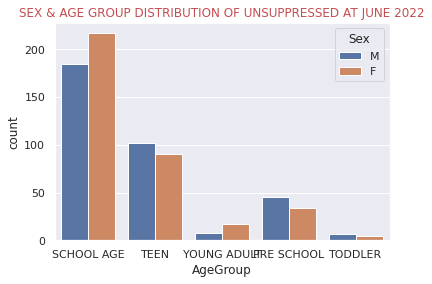

In [210]:
sns.countplot(data=df1.loc[df1['VL_30Jun2022'] =='UNSUPPRESSED'], x='AgeGroup', hue='Sex')
plt.title('SEX & AGE GROUP DISTRIBUTION OF UNSUPPRESSED AT JUNE 2022', 
          color='r', fontsize='medium')


Text(0.5, 1.0, 'SEX & AGE GROUP DISTRIBUTION OF SUPPRESSED AT JUNE 2022')

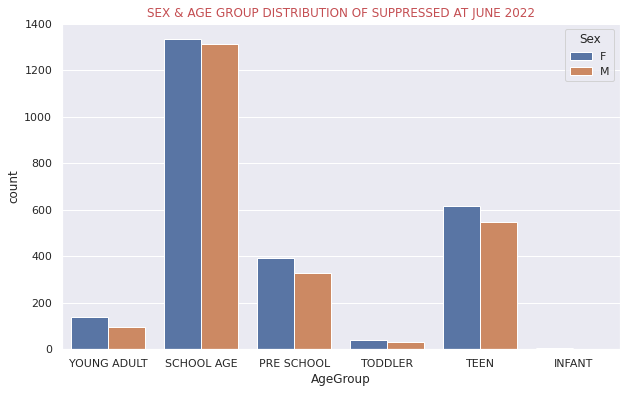

In [211]:
plt.figure(figsize = (10,6))
sns.countplot(data=df1.loc[df1['VL_30Jun2022'] =='SUPPRESSED'], x='AgeGroup', hue='Sex')
plt.title('SEX & AGE GROUP DISTRIBUTION OF SUPPRESSED AT JUNE 2022', 
          color='r', fontsize='medium')

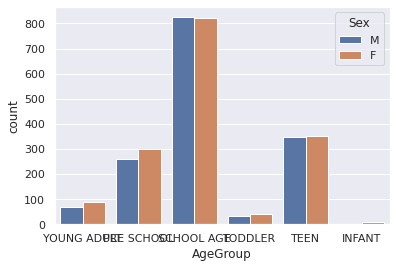

In [212]:
sns.countplot(data=df1.loc[df1['VL_30Jun2021'] =='SUPPRESSED'], x='AgeGroup', hue='Sex')


In [213]:
#showing outc

a = df1.groupby(['VL_30Jun2019', 'VL_30Jun2022'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

    VL_30Jun2019  VL_30Jun2022  Total  Percent(%)
0       HIGH LLV      HIGH LLV      3    0.048270
1       HIGH LLV       LOW LLV      6    0.096541
2       HIGH LLV    SUPPRESSED     71    1.142397
3       HIGH LLV  UNSUPPRESSED      8    0.128721
4        LOW LLV      HIGH LLV     12    0.193081
5        LOW LLV       LOW LLV     18    0.289622
6        LOW LLV    SUPPRESSED    218    3.507643
7        LOW LLV  UNSUPPRESSED     23    0.370072
8     SUPPRESSED      HIGH LLV    197    3.169751
9     SUPPRESSED       LOW LLV    333    5.358005
10    SUPPRESSED    SUPPRESSED   4070   65.486726
11    SUPPRESSED  UNSUPPRESSED    584    9.396621
12  UNSUPPRESSED      HIGH LLV     42    0.675784
13  UNSUPPRESSED       LOW LLV     42    0.675784
14  UNSUPPRESSED    SUPPRESSED    494    7.948512
15  UNSUPPRESSED  UNSUPPRESSED     94    1.512470


In [214]:
a = df1.groupby(['VL_30Jun2020', 'VL_30Jun2022'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

    VL_30Jun2020  VL_30Jun2022  Total  Percent(%)
0       HIGH LLV      HIGH LLV     15    0.241352
1       HIGH LLV       LOW LLV     15    0.241352
2       HIGH LLV    SUPPRESSED    178    2.864039
3       HIGH LLV  UNSUPPRESSED     28    0.450523
4        LOW LLV      HIGH LLV     42    0.675784
5        LOW LLV       LOW LLV     68    1.094127
6        LOW LLV    SUPPRESSED   1069   17.200322
7        LOW LLV  UNSUPPRESSED    123    1.979083
8     SUPPRESSED      HIGH LLV    126    2.027353
9     SUPPRESSED       LOW LLV    235    3.781175
10    SUPPRESSED    SUPPRESSED   2776   44.666130
11    SUPPRESSED  UNSUPPRESSED    350    5.631537
12  UNSUPPRESSED      HIGH LLV     71    1.142397
13  UNSUPPRESSED       LOW LLV     81    1.303298
14  UNSUPPRESSED    SUPPRESSED    830   13.354787
15  UNSUPPRESSED  UNSUPPRESSED    208    3.346742


In [215]:
a = df1.groupby(['VL_30Jun2021', 'VL_30Jun2022'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

    VL_30Jun2021  VL_30Jun2022  Total  Percent(%)
0       HIGH LLV      HIGH LLV     23    0.370072
1       HIGH LLV       LOW LLV     33    0.530973
2       HIGH LLV    SUPPRESSED    234    3.765084
3       HIGH LLV  UNSUPPRESSED     46    0.740145
4        LOW LLV      HIGH LLV     74    1.190668
5        LOW LLV       LOW LLV    123    1.979083
6        LOW LLV    SUPPRESSED   1460   23.491553
7        LOW LLV  UNSUPPRESSED    170    2.735318
8     SUPPRESSED      HIGH LLV    107    1.721641
9     SUPPRESSED       LOW LLV    182    2.928399
10    SUPPRESSED    SUPPRESSED   2582   41.544650
11    SUPPRESSED  UNSUPPRESSED    277    4.456959
12  UNSUPPRESSED      HIGH LLV     50    0.804505
13  UNSUPPRESSED       LOW LLV     61    0.981496
14  UNSUPPRESSED    SUPPRESSED    577    9.283990
15  UNSUPPRESSED  UNSUPPRESSED    216    3.475463


In [216]:
a = df1.groupby(['VL_31Dec2020', 'VL_30Jun2022'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

    VL_31Dec2020  VL_30Jun2022  Total  Percent(%)
0       HIGH LLV      HIGH LLV     21    0.337892
1       HIGH LLV       LOW LLV     20    0.321802
2       HIGH LLV    SUPPRESSED    217    3.491553
3       HIGH LLV  UNSUPPRESSED     49    0.788415
4        LOW LLV      HIGH LLV     66    1.061947
5        LOW LLV       LOW LLV    117    1.882542
6        LOW LLV    SUPPRESSED   1560   25.100563
7        LOW LLV  UNSUPPRESSED    164    2.638777
8     SUPPRESSED      HIGH LLV    115    1.850362
9     SUPPRESSED       LOW LLV    203    3.266291
10    SUPPRESSED    SUPPRESSED   2489   40.048270
11    SUPPRESSED  UNSUPPRESSED    306    4.923572
12  UNSUPPRESSED      HIGH LLV     52    0.836685
13  UNSUPPRESSED       LOW LLV     59    0.949316
14  UNSUPPRESSED    SUPPRESSED    587    9.444891
15  UNSUPPRESSED  UNSUPPRESSED    190    3.057120


In [217]:
a = df1.groupby(['VL_30Jun2020', 'VL_30Jun2022', 'Sex'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

    VL_30Jun2020  VL_30Jun2022 Sex  Total  Percent(%)
0       HIGH LLV      HIGH LLV   F      7    0.112631
1       HIGH LLV      HIGH LLV   M      8    0.128721
2       HIGH LLV       LOW LLV   F      6    0.096541
3       HIGH LLV       LOW LLV   M      9    0.144811
4       HIGH LLV    SUPPRESSED   F     95    1.528560
5       HIGH LLV    SUPPRESSED   M     83    1.335479
6       HIGH LLV  UNSUPPRESSED   F     14    0.225261
7       HIGH LLV  UNSUPPRESSED   M     14    0.225261
8        LOW LLV      HIGH LLV   F     21    0.337892
9        LOW LLV      HIGH LLV   M     21    0.337892
10       LOW LLV       LOW LLV   F     37    0.595334
11       LOW LLV       LOW LLV   M     31    0.498793
12       LOW LLV    SUPPRESSED   F    578    9.300080
13       LOW LLV    SUPPRESSED   M    491    7.900241
14       LOW LLV  UNSUPPRESSED   F     61    0.981496
15       LOW LLV  UNSUPPRESSED   M     62    0.997586
16    SUPPRESSED      HIGH LLV   F     67    1.078037
17    SUPPRESSED      HIGH L

In [218]:
a = df1.groupby(['VL_30Jun2022', 'AgeGroup'])['Sex'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df1) * 100
print(a)

    VL_30Jun2022     AgeGroup  Total  Percent(%)
0       HIGH LLV       INFANT      1    0.016090
1       HIGH LLV   PRE SCHOOL     33    0.530973
2       HIGH LLV   SCHOOL AGE    151    2.429606
3       HIGH LLV         TEEN     52    0.836685
4       HIGH LLV      TODDLER      8    0.128721
5       HIGH LLV  YOUNG ADULT      9    0.144811
6        LOW LLV       INFANT      1    0.016090
7        LOW LLV   PRE SCHOOL     70    1.126307
8        LOW LLV   SCHOOL AGE    220    3.539823
9        LOW LLV         TEEN     87    1.399839
10       LOW LLV      TODDLER      5    0.080451
11       LOW LLV  YOUNG ADULT     16    0.257442
12    SUPPRESSED       INFANT      8    0.128721
13    SUPPRESSED   PRE SCHOOL    720   11.584875
14    SUPPRESSED   SCHOOL AGE   2647   42.590507
15    SUPPRESSED         TEEN   1165   18.744972
16    SUPPRESSED      TODDLER     74    1.190668
17    SUPPRESSED  YOUNG ADULT    239    3.845535
18  UNSUPPRESSED   PRE SCHOOL     79    1.271118
19  UNSUPPRESSED   S

Text(0.5, 1.0, 'TOTAL NUMBER CLIENTS ON EACH REGIMEN')

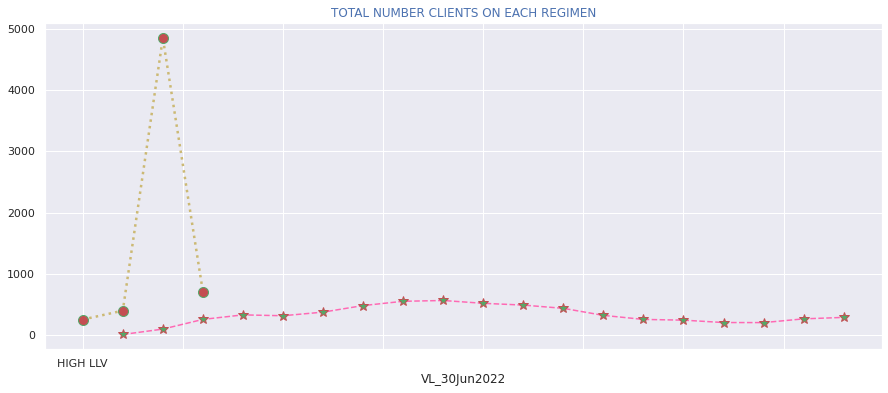

In [219]:

plt.figure(figsize = (15,6))
df1.groupby('CurAge_Years' ).size().plot (marker = '*', ms = 10, mec = 'r', mfc = 'g', ls = '--', c = 'hotpink', linewidth = '1.5')

df1.groupby('VL_30Jun2022').size().plot (marker = 'o', ms = 10, mec = 'g', mfc = 'r', ls = ':', c = 'y', linewidth = '2.5')

plt.title('TOTAL NUMBER CLIENTS ON EACH REGIMEN', color='b')

Text(0.5, 1.0, 'BARCHART SHOWING THE TOTAL NUMBER OF CLIENTS PER SEX ON EACH REGIMEN ')

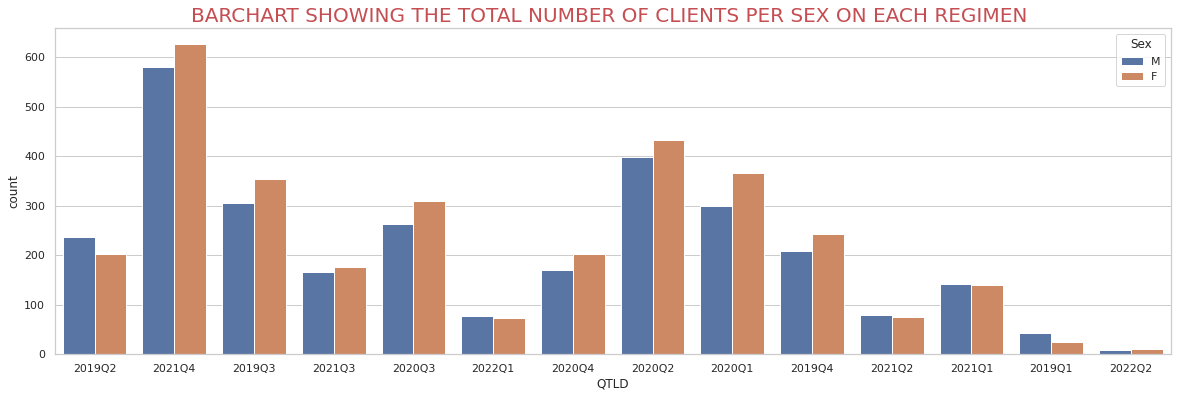

In [220]:
plt.figure(figsize = (20,6))
sns.set_style('whitegrid')
sns.countplot(x='QTLD', hue='Sex',data=df1)
plt.title('BARCHART SHOWING THE TOTAL NUMBER OF CLIENTS PER SEX ON EACH REGIMEN ', color='r', fontsize=20)

Text(0.5, 1.0, 'AGE GROUP DISTRIBUTION')

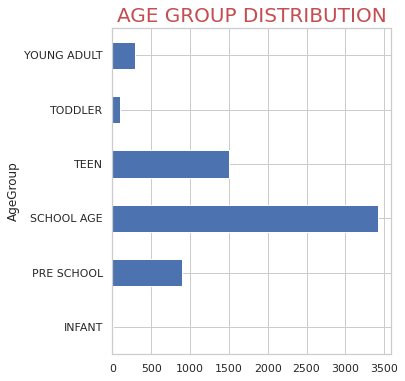

In [221]:
plt.figure(figsize = (5,6))
df1.groupby(df1['AgeGroup']).size().plot(kind = 'barh')
plt.title('AGE GROUP DISTRIBUTION', color='r', fontsize=20)

Text(0.5, 1.0, 'SHOWING SEX DISTRIBUTION')

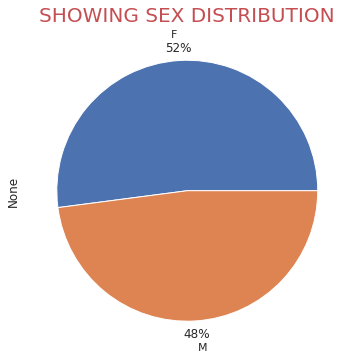

In [222]:
plt.figure(figsize = (10,6))
df1.groupby(df1['Sex']).size().plot(kind = 'pie', autopct='%1.0f%%', 
                                                                      pctdistance=1.1, labeldistance=1.2)
plt.title('SHOWING SEX DISTRIBUTION', color='r', fontsize=20)

Text(0.5, 1.0, 'SHOWING STATUS BASED ON SEX AFTER 6 MONTHS')

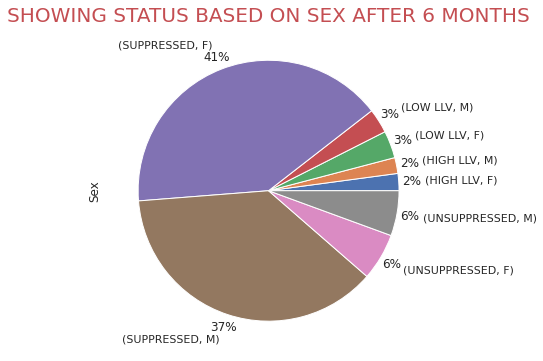

In [223]:
plt.figure(figsize = (15,6))
df1.groupby(['VL_30Jun2022','Sex'])['Sex'].count().plot(kind = 'pie', autopct='%1.0f%%', 
                                                                      pctdistance=1.1, labeldistance=1.2)
plt.title('SHOWING STATUS BASED ON SEX AFTER 6 MONTHS', color='r', fontsize=20)

Text(0.5, 1.0, 'SHOWING SUPPRESSION BASED ON SEX AFTER ONE YEAR')

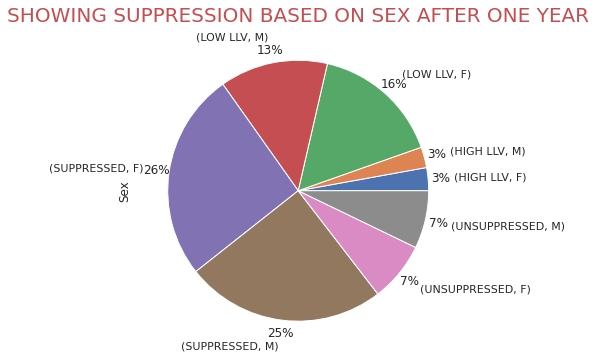

In [224]:
plt.figure(figsize = (15,6))
df1.groupby(['VL_30Jun2021','Sex'])['Sex'].count().plot(kind = 'pie', autopct='%0.0f%%', 
                                                                      pctdistance=1.1, labeldistance=1.2)
plt.title('SHOWING SUPPRESSION BASED ON SEX AFTER ONE YEAR', color='r', fontsize=20)

Text(0.5, 1.0, 'SHOWING SUPPRESSION BASED ON SEX AFTER SIX MONTHS AND REMAINED AFTER ONE YEAR')

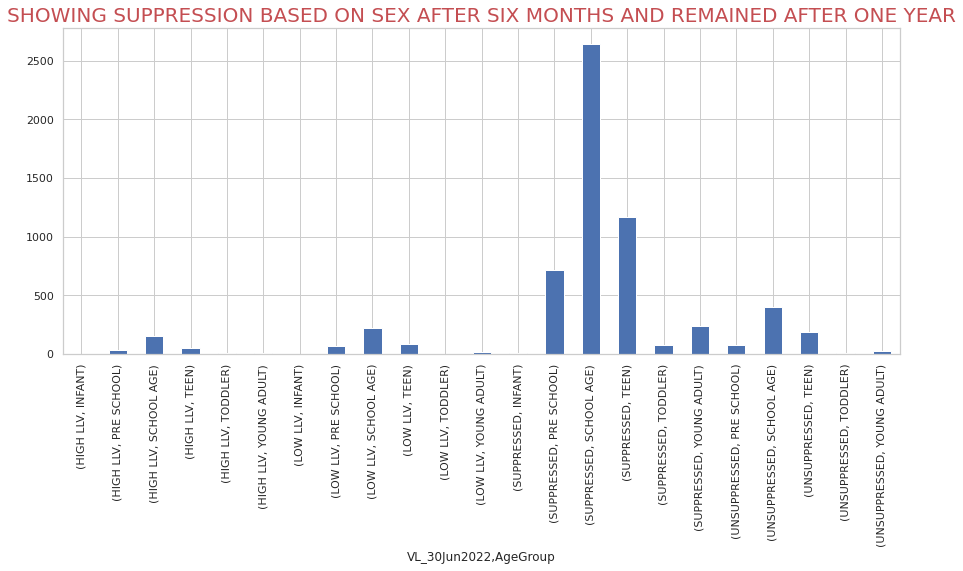

In [225]:
plt.figure(figsize = (15,6))
df1.groupby(['VL_30Jun2022','AgeGroup'])['Sex'].count().plot(kind = 'bar')
plt.title('SHOWING SUPPRESSION BASED ON SEX AFTER SIX MONTHS AND REMAINED AFTER ONE YEAR', color='r', fontsize=20)

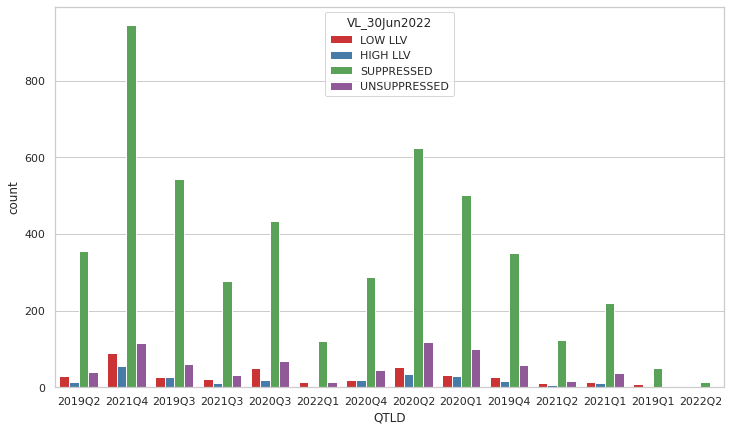

In [226]:
plt.figure(figsize = (12,7))
sns.countplot(x = 'QTLD' ,  hue = 'VL_30Jun2022', data = df1, palette='Set1')

Text(0.5, 1.0, 'SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON REGIMEN AFTER SIX MONTHS')

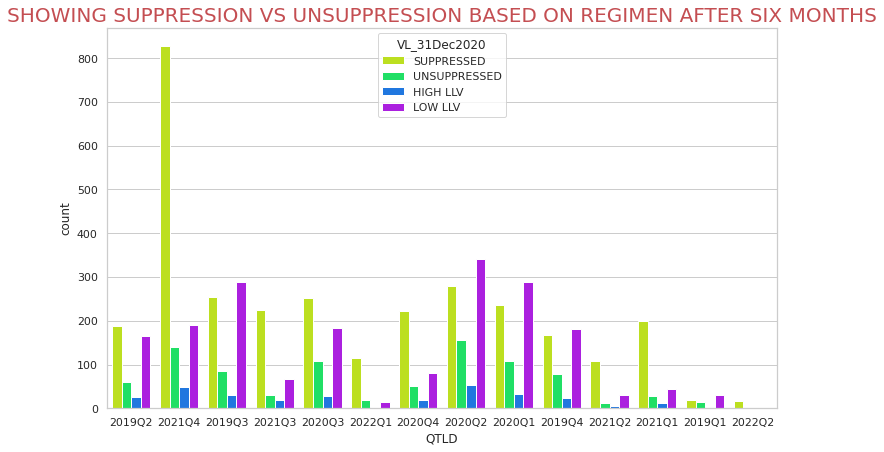

In [227]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'QTLD' ,  hue = 'VL_31Dec2020', data = df1, palette='hsv')
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON REGIMEN AFTER SIX MONTHS', color='r', fontsize=20)

Text(0.5, 1.0, 'SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON REGIMEN AFTER SIX MONTHS')

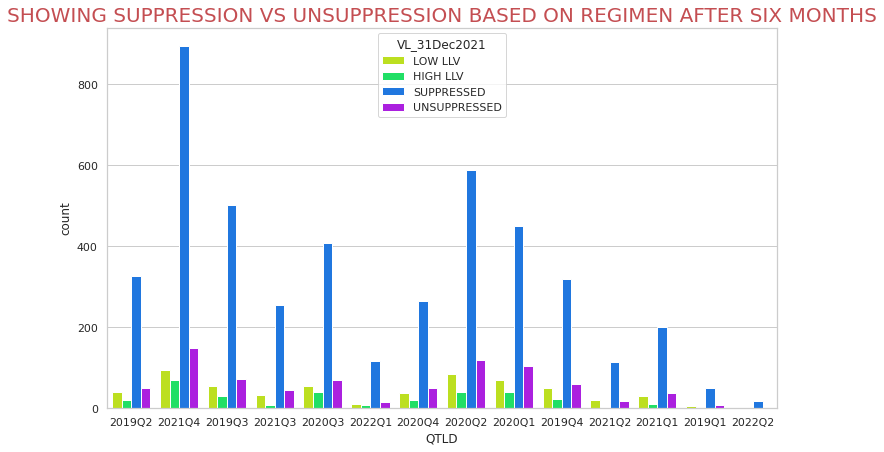

In [228]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'QTLD' ,  hue = 'VL_31Dec2021', data = df1, palette='hsv')
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON REGIMEN AFTER SIX MONTHS', color='r', fontsize=20)

Text(0.5, 1.0, 'SHOWING SUPPRESSION')

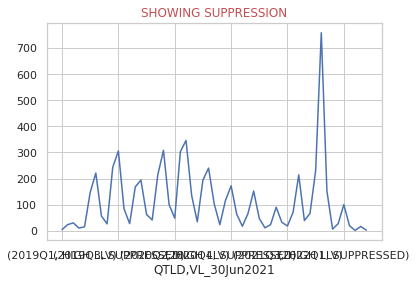

In [229]:
df1.groupby(['QTLD','VL_30Jun2021'])['QTLD'].count().plot()
plt.title('SHOWING SUPPRESSION', color='r')

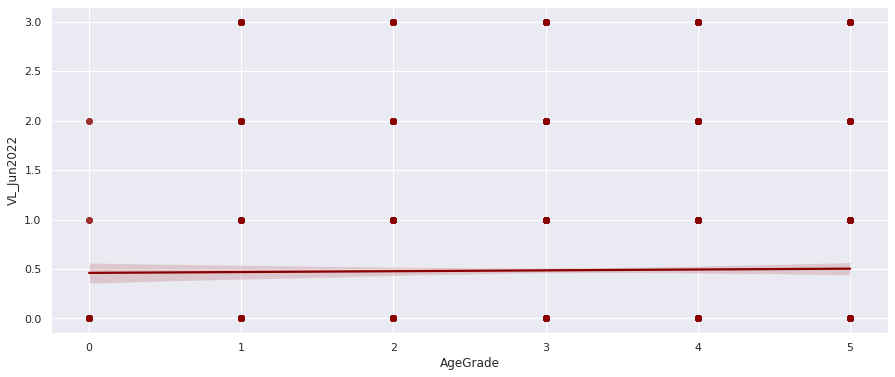

In [230]:
plt.figure(figsize = (15,6))
sns.set(style="darkgrid")
sns.regplot(x=df2.AgeGrade, y=df2['VL_Jun2022'], color='darkred')

Text(0.5, 1.0, 'HEATMAP OF PERCENTAGE CHANGE OVER THE YEARS (%)')

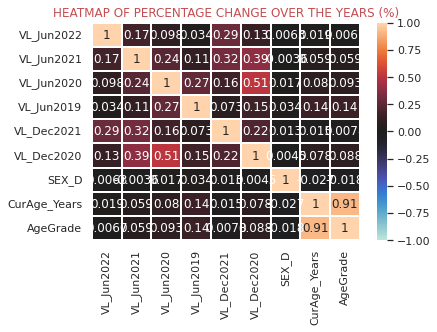

In [231]:
sns.heatmap(df2.corr(),linewidths=1, annot=True, center = 0, vmax = 1, vmin = -1)
plt.title('HEATMAP OF PERCENTAGE CHANGE OVER THE YEARS (%)', color='r')

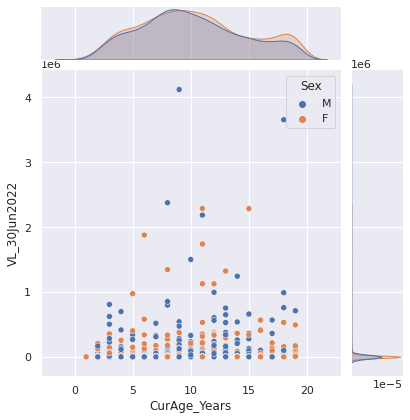

In [232]:
sns.jointplot(data=df, x="CurAge_Years", y="VL_30Jun2022", hue="Sex")


In [233]:
df2['STATUS'] = np.where(df1['VL_30Jun2022'] == "UNSUPPRESSED", 1, 0)


In [234]:
df2.columns


Index(['QTLD', 'VL_Jun2022', 'VL_Jun2021', 'VL_Jun2020', 'VL_Jun2019',
       'VL_Dec2021', 'VL_Dec2020', 'SEX_D', 'CurAge_Years', 'AgeGrade',
       'STATUS'],
      dtype='object')

In [235]:
import statsmodels.api as sm

#define response variable
y = df2['STATUS']

#define predictor variables
X = df2[['VL_Jun2021', 'VL_Jun2020', 'VL_Jun2019', 'VL_Dec2021', 'VL_Dec2020', 'SEX_D', 'AgeGrade']]

#add constant to predictor variables
X = sm.add_constant(X)

#fitting the regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 STATUS   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     73.78
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          5.08e-103
Time:                        09:00:37   Log-Likelihood:                -1448.0
No. Observations:                6215   AIC:                             2912.
Df Residuals:                    6207   BIC:                             2966.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0286      0.017      1.716      0.0

R-squared: 0.005. This is known as the coefficient of determination. It is the proportion of the variance in the response variable that can be explained by the predictor variables. In this example, 5% of the variation in the status can be explained by the VL_Jun2021, VL_Dec2021 and VL_Dec2020


F-statistic: 73.78. This is the overall F-statistic for the regression model.

Prob (F-statistic): 0.0005. This is the p-value associated with the overall F-statistic.  It tells us whether or not the regression model as a whole is statistically significant. In other words, it tells us if the predictor variables combined have a statistically significant association with the response variable. In this case the p-value is less than 0.05, which indicates that the predictor variables combined have a statistically significant association with the patient status.

coef: The coefficients for each predictor variable tell us the average expected change in the response variable, assuming the other predictor variable remains constant. For example, the younger the age group, the more it is to achieve viral suppression assuming all other factors remain constant, so also, suppression is more likely in female than in males.

P>|t|. The individual p-values tell us whether or not each predictor variable is statistically significant. We can see that all our variables are not statistically significant.